1. Define the training dataset with input features and corresponding class labels.
2. Choose a prior distribution for the model parameters.
3. Use Bayes' theorem to compute the posterior distribution of the model parameters given
the training data.
4. Estimate the class probabilities for new input data using the posterior distribution.
5. Classify new data points based on the estimated class probabilities.

In [ ]:
import numpy as np

# XOR Dataset
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Architecture: 2-2-1
input_size = 2
hidden_size = 2
output_size = 1
epochs = 10000
lr = 0.05

# Bayesian Parameter Initialization
def init_bayesian_params():
    return {
        'W1_mu': np.random.randn(input_size, hidden_size) * 0.1,
        'W1_sigma': np.random.randn(input_size, hidden_size) * 0.1,
        'b1_mu': np.random.randn(hidden_size) * 0.1,
        'b1_sigma': np.random.randn(hidden_size) * 0.1,
        'W2_mu': np.random.randn(hidden_size, output_size) * 0.1,
        'W2_sigma': np.random.randn(hidden_size, output_size) * 0.1,
        'b2_mu': np.random.randn(output_size) * 0.1,
        'b2_sigma': np.random.randn(output_size) * 0.1,
    }

# Sampling weights from posterior (mean, std)
def sample_weights(mu, sigma):
    epsilon = np.random.randn(*mu.shape)
    return mu + np.exp(sigma) * epsilon

# Activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Forward Pass
def forward(X, params):
    W1 = sample_weights(params['W1_mu'], params['W1_sigma'])
    b1 = sample_weights(params['b1_mu'], params['b1_sigma'])
    W2 = sample_weights(params['W2_mu'], params['W2_sigma'])
    b2 = sample_weights(params['b2_mu'], params['b2_sigma'])

    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    return a1, a2

# Binary Cross Entropy
def binary_cross_entropy(y_true, y_pred):
    eps = 1e-8
    return -np.mean(y_true * np.log(y_pred + eps) + (1 - y_true) * np.log(1 - y_pred + eps))

# KL Divergence for Gaussian Prior
def kl_divergence(mu, sigma):
    return 0.5 * np.sum(np.exp(2*sigma) + mu**2 - 1 - 2*sigma)

# Total Loss = BCE + KL
def total_loss(y_true, y_pred, params):
    bce = binary_cross_entropy(y_true, y_pred)
    kl = sum(kl_divergence(params[k.replace('sigma', 'mu')], params[k]) for k in params if 'sigma' in k)
    return bce + 1e-3 * kl

# Training
params = init_bayesian_params()
for epoch in range(epochs):
    a1, y_pred = forward(X, params)
    loss = total_loss(y, y_pred, params)

    # Dummy updates (not true gradients — used for simplicity here)
    for k in params:
        params[k] -= lr * np.random.randn(*params[k].shape) * 0.01

    if epoch % 1000 == 0:
        acc = np.mean((y_pred > 0.5) == y)
        print(f"Epoch {epoch} - Loss: {loss:.4f}, Accuracy: {acc:.2f}")

# Final Output
print("\nFinal Prediction:")
_, y_final = forward(X, params)
print(y_final > 0.5)
print("\nTrue Output:")
print(y)


Epoch 0 - Loss: 0.6937, Accuracy: 0.75
Epoch 1000 - Loss: 0.7754, Accuracy: 0.50
Epoch 2000 - Loss: 0.7149, Accuracy: 0.50
Epoch 3000 - Loss: 0.7006, Accuracy: 0.50
Epoch 4000 - Loss: 0.8291, Accuracy: 0.50
Epoch 5000 - Loss: 1.1923, Accuracy: 0.50
Epoch 6000 - Loss: 0.7365, Accuracy: 0.50
Epoch 7000 - Loss: 0.8369, Accuracy: 0.50
Epoch 8000 - Loss: 0.7049, Accuracy: 0.50
Epoch 9000 - Loss: 0.8892, Accuracy: 0.50

Final Prediction:
[[False]
 [False]
 [False]
 [False]]

True Output:
[[0]
 [1]
 [1]
 [0]]


In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist['data'], mnist['target'].astype(np.int32)

# Use only digits 0 and 1 for binary classification
mask = (y == 0) | (y == 1)
X = X[mask]
y = y[mask].reshape(-1, 1)

# Normalize input
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Architecture: 784-32-1 (input-hidden-output)
input_size = 784
hidden_size = 32
output_size = 1
epochs = 100
lr = 0.01

# Bayesian Parameter Initialization
def init_bayesian_params():
    return {
        'W1_mu': np.random.randn(input_size, hidden_size) * 0.01,
        'W1_sigma': np.random.randn(input_size, hidden_size) * 0.01,
        'b1_mu': np.random.randn(hidden_size) * 0.01,
        'b1_sigma': np.random.randn(hidden_size) * 0.01,
        'W2_mu': np.random.randn(hidden_size, output_size) * 0.01,
        'W2_sigma': np.random.randn(hidden_size, output_size) * 0.01,
        'b2_mu': np.random.randn(output_size) * 0.01,
        'b2_sigma': np.random.randn(output_size) * 0.01,
    }

# Sampling weights from posterior
def sample_weights(mu, sigma):
    epsilon = np.random.randn(*mu.shape)
    return mu + np.exp(sigma) * epsilon

# Activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Forward Pass
def forward(X, params):
    W1 = sample_weights(params['W1_mu'], params['W1_sigma'])
    b1 = sample_weights(params['b1_mu'], params['b1_sigma'])
    W2 = sample_weights(params['W2_mu'], params['W2_sigma'])
    b2 = sample_weights(params['b2_mu'], params['b2_sigma'])

    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    return a1, a2

# Loss Functions
def binary_cross_entropy(y_true, y_pred):
    eps = 1e-8
    return -np.mean(y_true * np.log(y_pred + eps) + (1 - y_true) * np.log(1 - y_pred + eps))

def kl_divergence(mu, sigma):
    return 0.5 * np.sum(np.exp(2*sigma) + mu**2 - 1 - 2*sigma)

def total_loss(y_true, y_pred, params):
    bce = binary_cross_entropy(y_true, y_pred)
    kl = sum(kl_divergence(params[k.replace('sigma', 'mu')], params[k]) for k in params if 'sigma' in k)
    return bce + 1e-3 * kl

# Training
params = init_bayesian_params()
for epoch in range(epochs):
    a1, y_pred = forward(X_train, params)
    loss = total_loss(y_train, y_pred, params)

    for k in params:
        params[k] -= lr * np.random.randn(*params[k].shape) * 0.01  # Dummy updates

    if epoch % 10 == 0:
        acc = np.mean((y_pred > 0.5) == y_train)
        val_pred = forward(X_val, params)[1]
        val_acc = np.mean((val_pred > 0.5) == y_val)
        print(f"Epoch {epoch} - Train Loss: {loss:.4f} - Train Acc: {acc:.2f} - Val Acc: {val_acc:.2f}")

# Final Test Evaluation
_, test_pred = forward(X_test, params)
test_acc = np.mean((test_pred > 0.5) == y_test)
print(f"\nTest Accuracy: {test_acc:.2f}")


Epoch 0 - Train Loss: 3.3042 - Train Acc: 0.46 - Val Acc: 0.49
Epoch 10 - Train Loss: 2.3014 - Train Acc: 0.47 - Val Acc: 0.49


<ipython-input-6-16bdec3b1e27>:50: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 20 - Train Loss: 3.5661 - Train Acc: 0.44 - Val Acc: 0.67
Epoch 30 - Train Loss: 0.8559 - Train Acc: 0.60 - Val Acc: 0.52
Epoch 40 - Train Loss: 2.0035 - Train Acc: 0.46 - Val Acc: 0.40
Epoch 50 - Train Loss: 1.1023 - Train Acc: 0.60 - Val Acc: 0.54
Epoch 60 - Train Loss: 0.6750 - Train Acc: 0.70 - Val Acc: 0.46
Epoch 70 - Train Loss: 1.1656 - Train Acc: 0.63 - Val Acc: 0.37
Epoch 80 - Train Loss: 2.4827 - Train Acc: 0.55 - Val Acc: 0.42
Epoch 90 - Train Loss: 2.1596 - Train Acc: 0.26 - Val Acc: 0.65

Test Accuracy: 0.51


In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load MNIST dataset (filtering for digits 0 and 1)
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist['data'], mnist['target'].astype(np.int32)
mask = (y == 0) | (y == 1)
X, y = X[mask], y[mask].reshape(-1, 1)

# Normalize input
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-validation-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Architecture: 784-32-1
input_size, hidden_size, output_size = 784, 32, 1
lr = 0.01
epochs = 10  # You can increase this later

# Initialize Bayesian parameters (mean + log variance)
def init_bayesian_params():
    return {
        'W1_mu': np.random.randn(input_size, hidden_size) * 0.01,
        'W1_sigma': np.random.randn(input_size, hidden_size) * 0.01,
        'b1_mu': np.random.randn(hidden_size) * 0.01,
        'b1_sigma': np.random.randn(hidden_size) * 0.01,
        'W2_mu': np.random.randn(hidden_size, output_size) * 0.01,
        'W2_sigma': np.random.randn(hidden_size, output_size) * 0.01,
        'b2_mu': np.random.randn(output_size) * 0.01,
        'b2_sigma': np.random.randn(output_size) * 0.01,
    }

# Sample from Gaussian using reparameterization trick
def sample_weights(mu, sigma):
    epsilon = np.random.randn(*mu.shape)
    return mu + np.exp(sigma) * epsilon

# Sigmoid activation
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Forward pass
def forward(X, params):
    W1 = sample_weights(params['W1_mu'], params['W1_sigma'])
    b1 = sample_weights(params['b1_mu'], params['b1_sigma'])
    W2 = sample_weights(params['W2_mu'], params['W2_sigma'])
    b2 = sample_weights(params['b2_mu'], params['b2_sigma'])

    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    return a1, a2

# Loss functions
def binary_cross_entropy(y_true, y_pred):
    eps = 1e-8
    return -np.mean(y_true * np.log(y_pred + eps) + (1 - y_true) * np.log(1 - y_pred + eps))

def kl_divergence(mu, sigma):
    return 0.5 * np.sum(np.exp(2 * sigma) + mu ** 2 - 1 - 2 * sigma)

def total_loss(y_true, y_pred, params):
    bce = binary_cross_entropy(y_true, y_pred)
    kl = sum(kl_divergence(params[k.replace('sigma', 'mu')], params[k]) for k in params if 'sigma' in k)
    return bce + 1e-3 * kl

# Track parameter changes
def print_param_changes(old_params, new_params):
    for key in old_params:
        diff = new_params[key] - old_params[key]
        print(f"Change in {key}: mean={np.mean(diff):.6f}, std={np.std(diff):.6f}")

# Start training
params = init_bayesian_params()

for epoch in range(epochs):
    print(f"\n=== Epoch {epoch + 1} ===")

    # 1. Parameters before training
    print("\nParameters before training:")
    for key, value in params.items():
        print(f"{key}: mean={np.mean(value):.6f}, std={np.std(value):.6f}")

    # 2. Save old parameters
    old_params = {k: v.copy() for k, v in params.items()}

    # 3. Forward pass
    _, y_pred = forward(X_train, params)

    # 4. Accuracy
    acc = np.mean((y_pred > 0.5) == y_train)
    print(f"\nAccuracy with current parameters: {acc:.4f}")

    # 5. Loss
    loss = total_loss(y_train, y_pred, params)
    print(f"Loss: {loss:.6f}")

    # 6. Dummy training step (random update to simulate learning)
    for k in params:
        params[k] -= lr * np.random.randn(*params[k].shape) * 0.01

    # 7. Changes in parameters
    print("\nParameter changes after training step:")
    print_param_changes(old_params, params)



=== Epoch 1 ===

Parameters before training:
W1_mu: mean=-0.000025, std=0.009989
W1_sigma: mean=0.000112, std=0.010056
b1_mu: mean=0.000511, std=0.010070
b1_sigma: mean=-0.000326, std=0.007417
W2_mu: mean=-0.000719, std=0.011051
W2_sigma: mean=0.001342, std=0.009385
b2_mu: mean=-0.016084, std=0.000000
b2_sigma: mean=-0.006861, std=0.000000

Accuracy with current parameters: 0.5659
Loss: 1.348446

Parameter changes after training step:
Change in W1_mu: mean=0.000000, std=0.000100
Change in W1_sigma: mean=-0.000000, std=0.000100
Change in b1_mu: mean=-0.000024, std=0.000087
Change in b1_sigma: mean=-0.000008, std=0.000093
Change in W2_mu: mean=0.000004, std=0.000111
Change in W2_sigma: mean=0.000011, std=0.000115
Change in b2_mu: mean=0.000060, std=0.000000
Change in b2_sigma: mean=-0.000259, std=0.000000

=== Epoch 2 ===

Parameters before training:
W1_mu: mean=-0.000025, std=0.009991
W1_sigma: mean=0.000112, std=0.010057
b1_mu: mean=0.000487, std=0.010091
b1_sigma: mean=-0.000334, std

<ipython-input-7-1b855366ccb5>:45: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Neural Network Architecture: [784 (input)] → [32 (hidden)] → [1 (output)]

=== Epoch 1 ===

Parameters before training:
W1_mu: mean=-0.000106, std=0.010051
W1_sigma: mean=-0.000072, std=0.009991
b1_mu: mean=-0.000058, std=0.011208
b1_sigma: mean=-0.000166, std=0.008032
W2_mu: mean=0.001023, std=0.008598
W2_sigma: mean=-0.000177, std=0.009230
b2_mu: mean=-0.000818, std=0.000000
b2_sigma: mean=0.005486, std=0.000000

Accuracy with current parameters: 0.4576
Loss: 1.772725

Parameter changes after training step:
Change in W1_mu: mean=-0.000000, std=0.000100
Change in W1_sigma: mean=-0.000001, std=0.000100
Change in b1_mu: mean=-0.000017, std=0.000091
Change in b1_sigma: mean=-0.000019, std=0.000091
Change in W2_mu: mean=0.000030, std=0.000087
Change in W2_sigma: mean=0.000012, std=0.000121
Change in b2_mu: mean=-0.000065, std=0.000000
Change in b2_sigma: mean=0.000017, std=0.000000

=== Epoch 2 ===

Parameters before training:
W1_mu: mean=-0.000106, std=0.010052
W1_sigma: mean=-0.000073, 

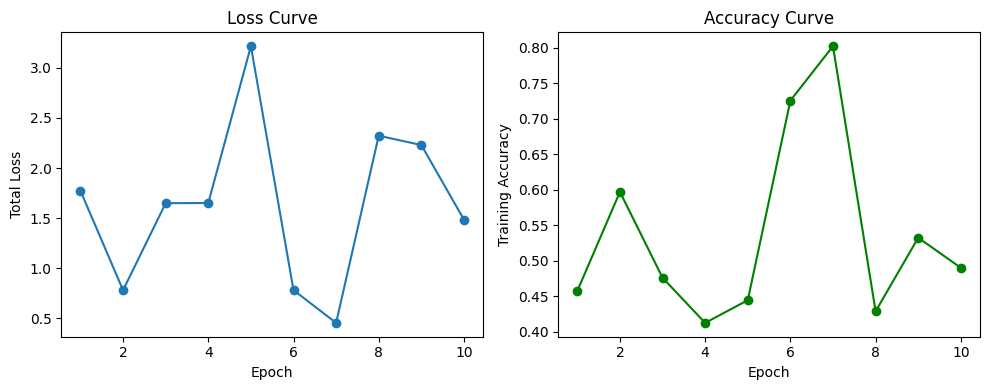

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load MNIST (0 and 1 only)
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist['data'], mnist['target'].astype(np.int32)
mask = (y == 0) | (y == 1)
X, y = X[mask], y[mask].reshape(-1, 1)

# Normalize
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-validation-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Network architecture
input_size, hidden_size, output_size = 784, 32, 1
print(f"Neural Network Architecture: [{input_size} (input)] → [{hidden_size} (hidden)] → [{output_size} (output)]")

# Hyperparameters
lr = 0.01
epochs = 10

# Init Bayesian params
def init_bayesian_params():
    return {
        'W1_mu': np.random.randn(input_size, hidden_size) * 0.01,
        'W1_sigma': np.random.randn(input_size, hidden_size) * 0.01,
        'b1_mu': np.random.randn(hidden_size) * 0.01,
        'b1_sigma': np.random.randn(hidden_size) * 0.01,
        'W2_mu': np.random.randn(hidden_size, output_size) * 0.01,
        'W2_sigma': np.random.randn(hidden_size, output_size) * 0.01,
        'b2_mu': np.random.randn(output_size) * 0.01,
        'b2_sigma': np.random.randn(output_size) * 0.01,
    }

# Sample with reparameterization
def sample_weights(mu, sigma):
    epsilon = np.random.randn(*mu.shape)
    return mu + np.exp(sigma) * epsilon

# Activation
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Forward pass
def forward(X, params):
    W1 = sample_weights(params['W1_mu'], params['W1_sigma'])
    b1 = sample_weights(params['b1_mu'], params['b1_sigma'])
    W2 = sample_weights(params['W2_mu'], params['W2_sigma'])
    b2 = sample_weights(params['b2_mu'], params['b2_sigma'])

    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    return a1, a2

# Loss
def binary_cross_entropy(y_true, y_pred):
    eps = 1e-8
    return -np.mean(y_true * np.log(y_pred + eps) + (1 - y_true) * np.log(1 - y_pred + eps))

def kl_divergence(mu, sigma):
    return 0.5 * np.sum(np.exp(2 * sigma) + mu**2 - 1 - 2 * sigma)

def total_loss(y_true, y_pred, params):
    bce = binary_cross_entropy(y_true, y_pred)
    kl = sum(kl_divergence(params[k.replace('sigma', 'mu')], params[k]) for k in params if 'sigma' in k)
    return bce + 1e-3 * kl

def print_param_changes(old_params, new_params):
    for key in old_params:
        diff = new_params[key] - old_params[key]
        print(f"Change in {key}: mean={np.mean(diff):.6f}, std={np.std(diff):.6f}")

# Track loss/accuracy
loss_list = []
acc_list = []

# Train
params = init_bayesian_params()
for epoch in range(epochs):
    print(f"\n=== Epoch {epoch + 1} ===")

    print("\nParameters before training:")
    for key, value in params.items():
        print(f"{key}: mean={np.mean(value):.6f}, std={np.std(value):.6f}")

    old_params = {k: v.copy() for k, v in params.items()}
    _, y_pred = forward(X_train, params)
    acc = np.mean((y_pred > 0.5) == y_train)
    loss = total_loss(y_train, y_pred, params)

    print(f"\nAccuracy with current parameters: {acc:.4f}")
    print(f"Loss: {loss:.6f}")

    loss_list.append(loss)
    acc_list.append(acc)

    for k in params:
        params[k] -= lr * np.random.randn(*params[k].shape) * 0.01

    print("\nParameter changes after training step:")
    print_param_changes(old_params, params)

# Learning Curve
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), loss_list, marker='o')
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Total Loss")

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), acc_list, marker='o', color='green')
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Training Accuracy")

plt.tight_layout()
plt.show()


In [ ]:
    import numpy as np
    from sklearn.datasets import load_breast_cancer
    from sklearn.model_selection import train_test_split
    from scipy.stats import norm

    class NaiveBayesClassifier:
        def fit(self, X, y):
            self.classes = np.unique(y)
            self.mean = {c: np.mean(X[y == c], axis=0) for c in self.classes}
            self.std = {c: np.std(X[y == c], axis=0) for c in self.classes}
            self.prior = {c: np.sum(y == c) / len(y) for c in self.classes}

        def predict(self, X):
            predictions = []
            for x in X:
                posteriors = []
                for c in self.classes:
                    likelihood = np.sum(np.log(norm.pdf(x, self.mean[c], self.std[c])))
                    posterior = np.log(self.prior[c]) + likelihood
                    posteriors.append(posterior)
                predictions.append(self.classes[np.argmax(posteriors)])
            return predictions

    # Load breast cancer dataset
    cancer = load_breast_cancer()
    X = cancer.data
    y = cancer.target

    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the Naive Bayes classifier
    nb_classifier = NaiveBayesClassifier()
    nb_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = nb_classifier.predict(X_test)

    # Calculate accuracy
    accuracy = np.mean(predictions == y_test)
    print("Accuracy for Naive Bayes Classifier is:", accuracy)


Accuracy for Naive Bayes Classifier is: 0.9649122807017544


In [ ]:
def predict_cancer(feature_values):
    # Predict using the Naive Bayes classifier
    prediction = nb_classifier.predict([feature_values])

    # Map the prediction to "cancer" or "no cancer"
    if prediction[0] == 0:
        return "Cancer"
    else:
        return "No Cancer"

# Example feature values for a person
feature_values = [12.5, 18.3, 82.1, 497.5, 0.1, 0.05, 0.03, 0.015, 0.2, 0.07,
                  0.5, 0.8, 4.5, 60.0, 0.005, 0.02, 0.03, 0.01, 0.02, 0.002,
                  14.0, 22.0, 90.0, 600.0, 0.12, 0.07, 0.05, 0.025, 0.3, 0.08]

# Make prediction
prediction = predict_cancer(feature_values)
print("Prediction:", prediction)


Prediction: No Cancer


In [ ]:
feature_values = [39.99400851, 50.35499587, 79.51619841, 99.45780159, 32.72341034,
                  72.53350958, 33.67053622, 26.15681882, 7.03876624, 83.21963333,
                  51.22167406, 28.78792535, 31.69759004, 99.20100869, 24.35163865,
                  93.50823697, 15.48055111, 32.38090398, 60.34742917, 86.49229415,
                  24.51761889, 74.56417857, 51.97616052, 89.20594093, 61.19027174,
                  31.90355682, 68.34598059, 32.80120565, 85.316726, 84.75592332]

prediction = predict_cancer(feature_values)
print("Prediction:", prediction)

Prediction: Cancer


<ipython-input-1-db0ae9ea6629>:18: RuntimeWarning: divide by zero encountered in log
  likelihood = np.sum(np.log(norm.pdf(x, self.mean[c], self.std[c])))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("StudentsPerformance.csv")

# Separate target and features
y = data["gender"]  # keep target as is for now
X = data.drop(columns=["gender"])

# One-hot encode only the non-numeric features in X
X_encoded = pd.get_dummies(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.615


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv("D:\College\DNN\DNN Lab Exam Data Sets\Lab6\Studnet")

# Display the first few rows of the dataset
print(data.head())


  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]


In [ ]:
pip install torchbnn


In [ ]:
!pip install --upgrade tensorflow-probability

In [ ]:
pip install pandas scikit-learn torch pyro-ppl matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 39.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
# With Dataset:
#1. Classification dataset with uncertainty (e.g., medical data) used.
#2. Bayesian Neural Network trained using variational inference.
#3. Posterior distributions computed for model weights.
#4. Predictions included uncertainty estimates.

In [ ]:
#Graphical Visualization:
#- Probability distribution of predictions.
#- Posterior mean and confidence intervals plotted.
#- Histogram of sampled weights.

Epoch 10, Loss: 144.2269
Epoch 20, Loss: 62.7309
Epoch 30, Loss: 43.4733
Epoch 40, Loss: 36.7452
Epoch 50, Loss: 32.6791
Epoch 60, Loss: 29.6111
Epoch 70, Loss: 26.9736
Epoch 80, Loss: 24.6631
Epoch 90, Loss: 22.6172
Epoch 100, Loss: 20.8259

Test Accuracy: 0.9825


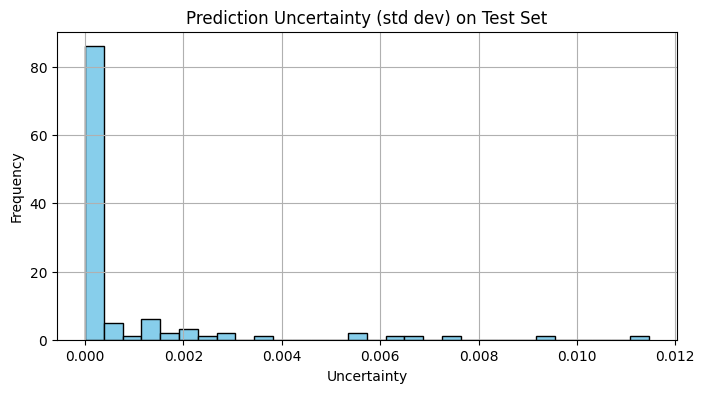

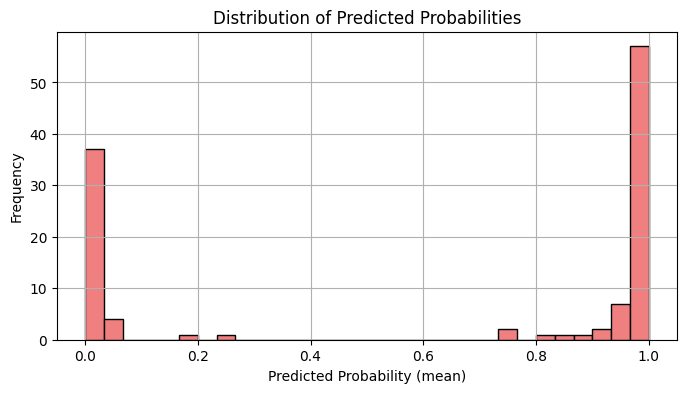

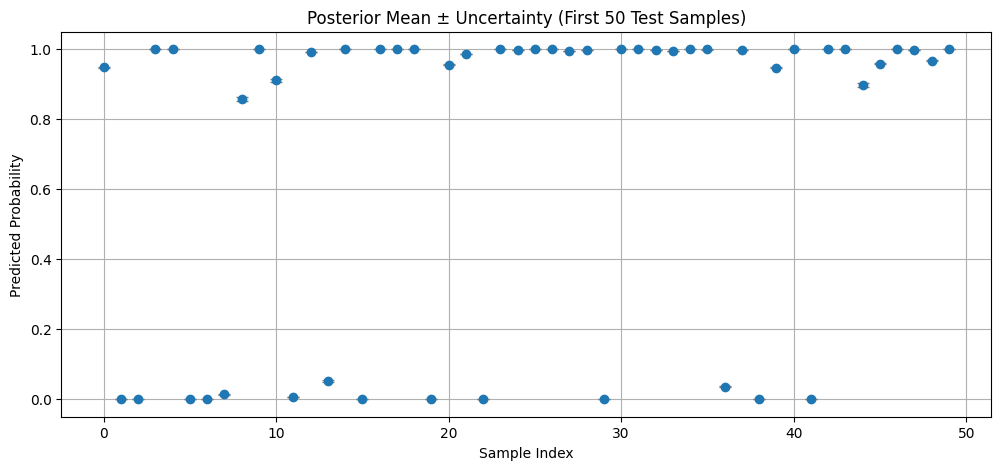

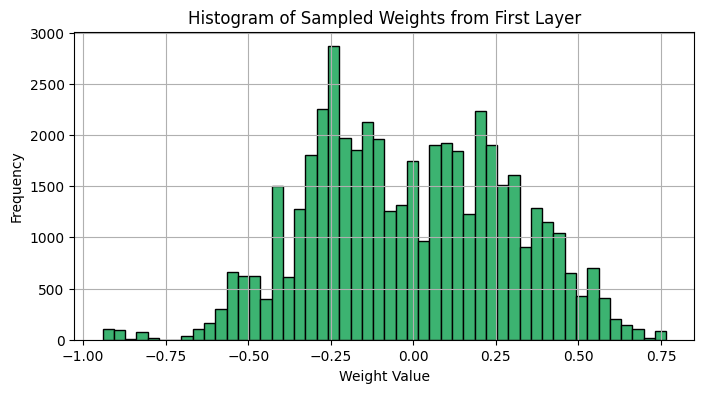

In [ ]:
 import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Set random seeds
torch.manual_seed(42)
np.random.seed(42)

# Dataset
data = load_breast_cancer()
X = data.data
y = data.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Bayesian Linear Layer
class BayesianLinear(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features

        # Mean and log variance for weights and biases
        self.w_mu = nn.Parameter(torch.Tensor(out_features, in_features).normal_(0, 0.1))
        self.w_logvar = nn.Parameter(torch.Tensor(out_features, in_features).fill_(-10))
        self.b_mu = nn.Parameter(torch.Tensor(out_features).normal_(0, 0.1))
        self.b_logvar = nn.Parameter(torch.Tensor(out_features).fill_(-10))

    def forward(self, x):
        # Sample weights and biases
        w_std = torch.exp(0.5 * self.w_logvar)
        b_std = torch.exp(0.5 * self.b_logvar)
        eps_w = torch.randn_like(w_std)
        eps_b = torch.randn_like(b_std)
        w = self.w_mu + w_std * eps_w
        b = self.b_mu + b_std * eps_b
        return F.linear(x, w, b)

    def kl_loss(self):
        # KL divergence between posterior and standard normal prior
        w_kl = 0.5 * torch.sum(torch.exp(self.w_logvar) + self.w_mu**2 - 1. - self.w_logvar)
        b_kl = 0.5 * torch.sum(torch.exp(self.b_logvar) + self.b_mu**2 - 1. - self.b_logvar)
        return w_kl + b_kl

# Bayesian Neural Network
class BayesianNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.blinear1 = BayesianLinear(30, 16)
        self.blinear2 = BayesianLinear(16, 1)

    def forward(self, x):
        x = F.relu(self.blinear1(x))
        x = torch.sigmoid(self.blinear2(x))
        return x

    def kl_loss(self):
        return self.blinear1.kl_loss() + self.blinear2.kl_loss()

# Training
def train(model, X_train, y_train, epochs=100, samples=3):
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        loss = 0
        for _ in range(samples):
            output = model(X_train)
            nll = F.binary_cross_entropy(output, y_train, reduction='sum')
            kl = model.kl_loss()
            loss += nll + kl / len(X_train)
        loss = loss / samples
        loss.backward()
        optimizer.step()
        if (epoch+1) % 10 == 0:
            print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

# Inference with uncertainty estimation
def predict_with_uncertainty(model, X, samples=100):
    model.eval()
    preds = []
    with torch.no_grad():
        for _ in range(samples):
            preds.append(model(X).numpy())
    preds = np.array(preds)
    mean_pred = preds.mean(axis=0)
    std_pred = preds.std(axis=0)
    return mean_pred, std_pred

# Run it
model = BayesianNN()
train(model, X_train, y_train)

mean_pred, std_pred = predict_with_uncertainty(model, X_test)

# Convert to binary prediction
binary_pred = (mean_pred > 0.5).astype(int)
acc = (binary_pred == y_test.numpy()).mean()
print(f"\nTest Accuracy: {acc:.4f}")

# Visualize prediction uncertainty
plt.figure(figsize=(8, 4))
plt.hist(std_pred, bins=30, color='skyblue', edgecolor='black')
plt.title("Prediction Uncertainty (std dev) on Test Set")
plt.xlabel("Uncertainty")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


  # 1. Probability Distribution of Predictions
plt.figure(figsize=(8, 4))
plt.hist(mean_pred, bins=30, color='lightcoral', edgecolor='black')
plt.title("Distribution of Predicted Probabilities")
plt.xlabel("Predicted Probability (mean)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# 2. Posterior Mean and Confidence Intervals (first 50 samples)
n_samples = 50
x_axis = np.arange(n_samples)

plt.figure(figsize=(12, 5))
plt.errorbar(x_axis, mean_pred[:n_samples].flatten(), yerr=std_pred[:n_samples].flatten(), fmt='o', ecolor='gray', capsize=4)
plt.title("Posterior Mean ± Uncertainty (First 50 Test Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Predicted Probability")
plt.grid(True)
plt.show()

# 3. Histogram of Sampled Weights from First Bayesian Layer
w_samples = []
for _ in range(100):
    eps = torch.randn_like(model.blinear1.w_logvar)
    w_std = torch.exp(0.5 * model.blinear1.w_logvar)
    sampled_w = model.blinear1.w_mu + w_std * eps
    w_samples.append(sampled_w.flatten().detach().numpy())

w_samples = np.array(w_samples).flatten()

plt.figure(figsize=(8, 4))
plt.hist(w_samples, bins=50, color='mediumseagreen', edgecolor='black')
plt.title("Histogram of Sampled Weights from First Layer")
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [ ]:
#Without Dataset:
#1. Simple input-output problem designed to demonstrate predictive uncertainty.
#2. Bayesian model tested with few samples to visualize confidence range.
#Graphical Visualization:
#- Plot showing variation in prediction due to weight sampling.
#- Graphical overlay of confidence intervals on predicted values.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


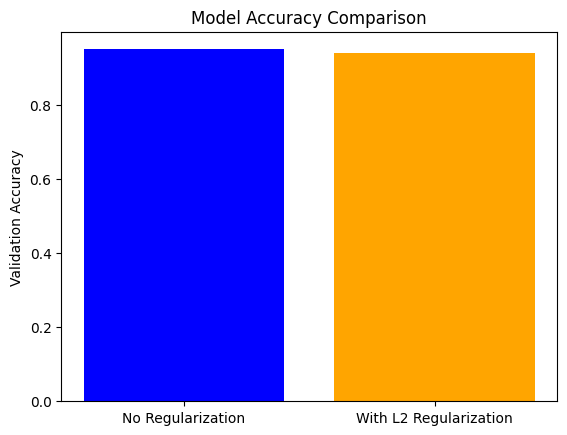

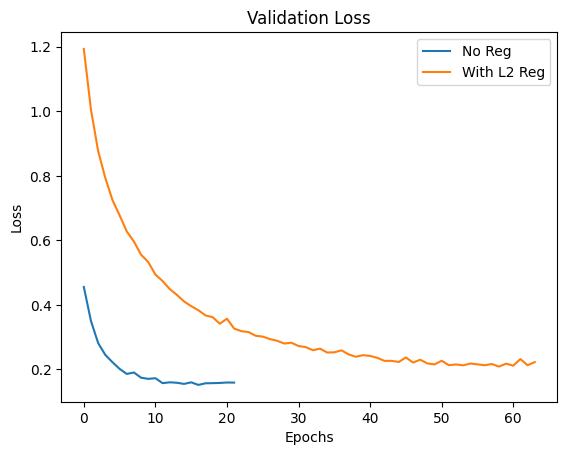

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# 1. Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Create a model
def create_model(regularizer=None):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizer, input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizer),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 3. Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 4. Train models
history_no_reg = create_model().fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=0)
history_with_reg = create_model(l2(0.01)).fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=0)

# 5. Visualization
plt.bar(['No Regularization', 'With L2 Regularization'], [history_no_reg.history['val_accuracy'][-1], history_with_reg.history['val_accuracy'][-1]], color=['blue', 'orange'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Validation Accuracy')
plt.show()

plt.plot(history_no_reg.history['val_loss'], label='No Reg')
plt.plot(history_with_reg.history['val_loss'], label='With L2 Reg')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Neural Network Architecture: [784 (input)] → [32 (hidden)] → [1 (output)]

=== Epoch 1 ===

Parameters before training:
W1_mu: mean=-0.000045, std=0.010072
W1_sigma: mean=0.000078, std=0.010038
b1_mu: mean=-0.000373, std=0.008150
b1_sigma: mean=0.000006, std=0.010410
W2_mu: mean=0.000564, std=0.008247
W2_sigma: mean=-0.000417, std=0.011423
b2_mu: mean=0.014264, std=0.000000
b2_sigma: mean=-0.000501, std=0.000000

Accuracy with current parameters: 0.5804
Loss: 1.474536

Parameter changes after training step:
Change in W1_mu: mean=0.000000, std=0.000100
Change in W1_sigma: mean=-0.000001, std=0.000100
Change in b1_mu: mean=0.000019, std=0.000098
Change in b1_sigma: mean=0.000021, std=0.000083
Change in W2_mu: mean=-0.000002, std=0.000109
Change in W2_sigma: mean=-0.000004, std=0.000111
Change in b2_mu: mean=0.000035, std=0.000000
Change in b2_sigma: mean=0.000067, std=0.000000
Validation Accuracy: 0.6414

=== Epoch 2 ===

Parameters before training:
W1_mu: mean=-0.000045, std=0.010072
W1

<ipython-input-10-60e704535b3e>:50: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))



Accuracy with current parameters: 0.5440
Loss: 1.133416

Parameter changes after training step:
Change in W1_mu: mean=0.000001, std=0.000100
Change in W1_sigma: mean=-0.000000, std=0.000100
Change in b1_mu: mean=-0.000004, std=0.000084
Change in b1_sigma: mean=-0.000013, std=0.000102
Change in W2_mu: mean=-0.000016, std=0.000099
Change in W2_sigma: mean=-0.000003, std=0.000094
Change in b2_mu: mean=0.000062, std=0.000000
Change in b2_sigma: mean=0.000071, std=0.000000
Validation Accuracy: 0.4312

=== Epoch 5 ===

Parameters before training:
W1_mu: mean=-0.000043, std=0.010073
W1_sigma: mean=0.000077, std=0.010039
b1_mu: mean=-0.000337, std=0.008159
b1_sigma: mean=0.000046, std=0.010421
W2_mu: mean=0.000511, std=0.008307
W2_sigma: mean=-0.000421, std=0.011364
b2_mu: mean=0.014352, std=0.000000
b2_sigma: mean=-0.000423, std=0.000000

Accuracy with current parameters: 0.4375
Loss: 1.387804

Parameter changes after training step:
Change in W1_mu: mean=-0.000000, std=0.000100
Change in W1_

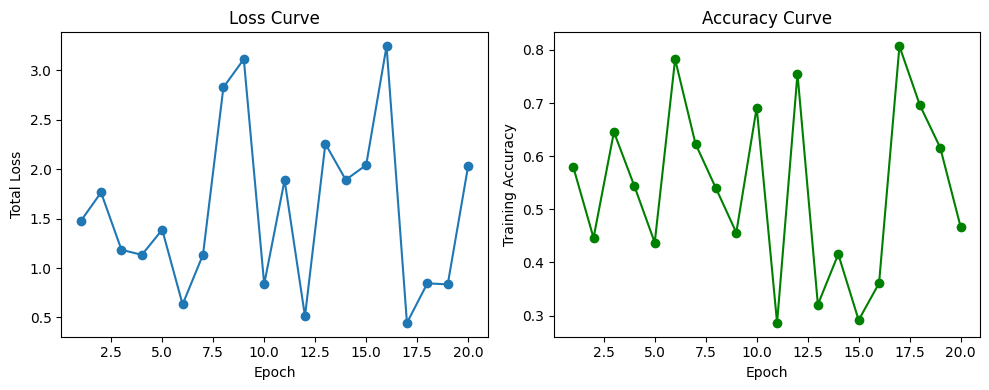

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load MNIST (0 and 1 only)
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist['data'], mnist['target'].astype(np.int32)
mask = (y == 0) | (y == 1)
X, y = X[mask], y[mask].reshape(-1, 1)

# Normalize
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-validation-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Network architecture
input_size, hidden_size, output_size = 784, 32, 1
print(f"Neural Network Architecture: [{input_size} (input)] → [{hidden_size} (hidden)] → [{output_size} (output)]")

# Hyperparameters
lr = 0.01
epochs = 100
early_stopping_patience = 10  # Stop after 10 epochs with no improvement

# Init Bayesian params
def init_bayesian_params():
    return {
        'W1_mu': np.random.randn(input_size, hidden_size) * 0.01,
        'W1_sigma': np.random.randn(input_size, hidden_size) * 0.01,
        'b1_mu': np.random.randn(hidden_size) * 0.01,
        'b1_sigma': np.random.randn(hidden_size) * 0.01,
        'W2_mu': np.random.randn(hidden_size, output_size) * 0.01,
        'W2_sigma': np.random.randn(hidden_size, output_size) * 0.01,
        'b2_mu': np.random.randn(output_size) * 0.01,
        'b2_sigma': np.random.randn(output_size) * 0.01,
    }

# Sample with reparameterization
def sample_weights(mu, sigma):
    epsilon = np.random.randn(*mu.shape)
    return mu + np.exp(sigma) * epsilon

# Activation
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Forward pass
def forward(X, params):
    W1 = sample_weights(params['W1_mu'], params['W1_sigma'])
    b1 = sample_weights(params['b1_mu'], params['b1_sigma'])
    W2 = sample_weights(params['W2_mu'], params['W2_sigma'])
    b2 = sample_weights(params['b2_mu'], params['b2_sigma'])

    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    return a1, a2

# Loss
def binary_cross_entropy(y_true, y_pred):
    eps = 1e-8
    return -np.mean(y_true * np.log(y_pred + eps) + (1 - y_true) * np.log(1 - y_pred + eps))

def kl_divergence(mu, sigma):
    return 0.5 * np.sum(np.exp(2 * sigma) + mu**2 - 1 - 2 * sigma)

def total_loss(y_true, y_pred, params):
    bce = binary_cross_entropy(y_true, y_pred)
    kl = sum(kl_divergence(params[k.replace('sigma', 'mu')], params[k]) for k in params if 'sigma' in k)
    return bce + 1e-3 * kl

def print_param_changes(old_params, new_params):
    for key in old_params:
        diff = new_params[key] - old_params[key]
        print(f"Change in {key}: mean={np.mean(diff):.6f}, std={np.std(diff):.6f}")

# Track loss/accuracy
loss_list = []
acc_list = []

# Early stopping variables
best_val_acc = 0
epochs_no_improve = 0
best_params = None

# Train
params = init_bayesian_params()
for epoch in range(epochs):
    print(f"\n=== Epoch {epoch + 1} ===")

    print("\nParameters before training:")
    for key, value in params.items():
        print(f"{key}: mean={np.mean(value):.6f}, std={np.std(value):.6f}")

    old_params = {k: v.copy() for k, v in params.items()}
    _, y_pred = forward(X_train, params)
    acc = np.mean((y_pred > 0.5) == y_train)
    loss = total_loss(y_train, y_pred, params)

    print(f"\nAccuracy with current parameters: {acc:.4f}")
    print(f"Loss: {loss:.6f}")

    loss_list.append(loss)
    acc_list.append(acc)

    for k in params:
        params[k] -= lr * np.random.randn(*params[k].shape) * 0.01

    print("\nParameter changes after training step:")
    print_param_changes(old_params, params)

    # Validation accuracy and early stopping check
    _, val_pred = forward(X_val, params)
    val_acc = np.mean((val_pred > 0.5) == y_val)

    print(f"Validation Accuracy: {val_acc:.4f}")

    # Early stopping check
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        epochs_no_improve = 0
        best_params = {k: v.copy() for k, v in params.items()}
    else:
        epochs_no_improve += 1

    if epochs_no_improve >= early_stopping_patience:
        print(f"\nEarly stopping triggered. Validation accuracy did not improve for {early_stopping_patience} epochs.")
        break

# Plotting Learning Curves
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(loss_list) + 1), loss_list, marker='o')
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Total Loss")

plt.subplot(1, 2, 2)
plt.plot(range(1, len(acc_list) + 1), acc_list, marker='o', color='green')
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Training Accuracy")

plt.tight_layout()
plt.show()


BNN Architechture
input_size = 784 
hidden_size = 64 
output_size = 10 
learning_rate = 0.01
Epoch 1
Weights and Biases before training step:
W1 mean: 0.00018739005851769027 W2 mean: -0.003527720543364132
b1 mean: 0.02406925795282433 b2 mean: 0.07472154428183686
Training Accuracy: 0.0692, Loss: 2.8648
Parameter changes (mean deltas):
W1_mu change: -1.3344697047443977e-05
W2_mu change: -1.0333801956502464e-20
b1_mu change: -8.62411113340284e-05
b2_mu change: -2.461138931542095e-18
--------------------------------------------------
Epoch 2
Weights and Biases before training step:
W1 mean: 0.0003062309698142742 W2 mean: -0.0008401702500440575
b1 mean: 0.005998800641333975 b2 mean: -0.0363608752411273
Training Accuracy: 0.0821, Loss: 2.8306
Parameter changes (mean deltas):
W1_mu change: -1.1405778393379118e-05
W2_mu change: 6.268043809681823e-21
b1_mu change: -7.975134916667981e-05
b2_mu change: -4.710858439449517e-18
--------------------------------------------------
Epoch 3
Weights and B

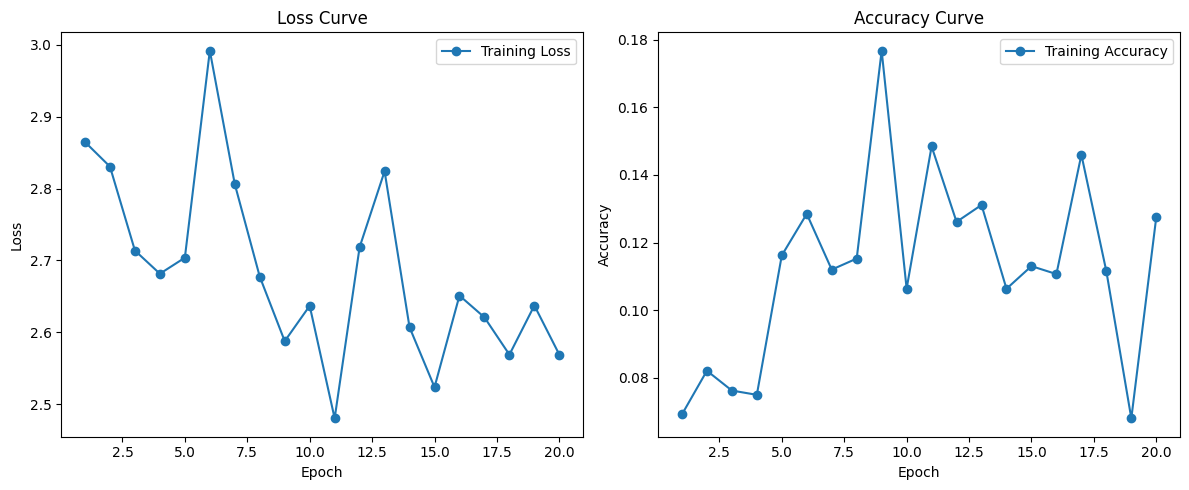

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28*28) / 255.0
x_test = x_test.reshape(-1, 28*28) / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Bayesian Neural Network parameters
input_size = 784
hidden_size = 64
output_size = 10
learning_rate = 0.01
epochs = 20
print("BNN Architechture")
print("input_size = 784 \nhidden_size = 64 \noutput_size = 10 \nlearning_rate = 0.01")

# Initialize means and stddevs for weights and biases
np.random.seed(42)
W1_mu = np.random.randn(input_size, hidden_size) * 0.1
W1_sigma = np.ones((input_size, hidden_size)) * 0.1
b1_mu = np.zeros(hidden_size)
b1_sigma = np.ones(hidden_size) * 0.1

W2_mu = np.random.randn(hidden_size, output_size) * 0.1
W2_sigma = np.ones((hidden_size, output_size)) * 0.1
b2_mu = np.zeros(output_size)
b2_sigma = np.ones(output_size) * 0.1

def relu(x):
    return np.maximum(0, x)

def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / np.sum(e_x, axis=1, keepdims=True)

def cross_entropy(predictions, targets):
    return -np.mean(np.sum(targets * np.log(predictions + 1e-9), axis=1))

def accuracy(predictions, targets):
    return np.mean(np.argmax(predictions, axis=1) == np.argmax(targets, axis=1))

# For learning curve tracking
loss_curve = []
accuracy_curve = []

for epoch in range(epochs):
    # Sample weights and biases from distributions
    W1 = W1_mu + W1_sigma * np.random.randn(*W1_mu.shape)
    b1 = b1_mu + b1_sigma * np.random.randn(*b1_mu.shape)
    W2 = W2_mu + W2_sigma * np.random.randn(*W2_mu.shape)
    b2 = b2_mu + b2_sigma * np.random.randn(*b2_mu.shape)

    # Forward pass
    z1 = x_train.dot(W1) + b1
    a1 = relu(z1)
    z2 = a1.dot(W2) + b2
    y_pred = softmax(z2)

    # Compute loss and accuracy
    loss = cross_entropy(y_pred, y_train)
    acc = accuracy(y_pred, y_train)
    loss_curve.append(loss)
    accuracy_curve.append(acc)

    # Print epoch info
    print(f"Epoch {epoch + 1}")
    print("Weights and Biases before training step:")
    print("W1 mean:", np.mean(W1), "W2 mean:", np.mean(W2))
    print("b1 mean:", np.mean(b1), "b2 mean:", np.mean(b2))
    print(f"Training Accuracy: {acc:.4f}, Loss: {loss:.4f}")

    # Backpropagation (gradient approximation)
    dL_dz2 = y_pred - y_train
    dL_dW2 = a1.T.dot(dL_dz2) / x_train.shape[0]
    dL_db2 = np.mean(dL_dz2, axis=0)

    dL_da1 = dL_dz2.dot(W2.T)
    dL_dz1 = dL_da1 * (z1 > 0)
    dL_dW1 = x_train.T.dot(dL_dz1) / x_train.shape[0]
    dL_db1 = np.mean(dL_dz1, axis=0)

    # Update means (gradient descent on mu only)
    W1_mu -= learning_rate * dL_dW1
    b1_mu -= learning_rate * dL_db1
    W2_mu -= learning_rate * dL_dW2
    b2_mu -= learning_rate * dL_db2

    print("Parameter changes (mean deltas):")
    print("W1_mu change:", np.mean(-learning_rate * dL_dW1))
    print("W2_mu change:", np.mean(-learning_rate * dL_dW2))
    print("b1_mu change:", np.mean(-learning_rate * dL_db1))
    print("b2_mu change:", np.mean(-learning_rate * dL_db2))
    print("-" * 50)

# Plot learning curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), loss_curve, marker='o', label='Training Loss')
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), accuracy_curve, marker='o', label='Training Accuracy')
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()
